In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tatasteel-historic-data/TATASTEEL.NS.csv


In [39]:
import cufflinks as cf
cf.go_offline()
df=pd.read_csv('/kaggle/input/tatasteel-historic-data/TATASTEEL.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,103.000000,103.139999,101.065002,102.370003,45.504997,95225630
1,2022-06-13,100.430000,101.199997,99.000000,99.195000,44.093662,82235750
2,2022-06-14,98.824997,101.370003,98.555000,99.614998,44.280357,77202600
3,2022-06-15,95.394997,97.425003,95.065002,95.955002,44.955002,92443330
4,2022-06-16,97.500000,97.500000,89.820000,90.169998,90.169998,122741050
...,...,...,...,...,...,...,...
243,2023-06-05,108.650002,109.900002,107.800003,109.400002,109.400002,39642539
244,2023-06-06,109.750000,109.849998,108.300003,109.000000,109.000000,26751372
245,2023-06-07,109.500000,111.750000,108.900002,111.500000,111.500000,45157197
246,2023-06-08,111.500000,113.000000,110.949997,111.150002,111.150002,46380294


In [40]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [41]:
train_X=df.iloc[:10,1].values.reshape(-1,1) #first ten
train_Y=df.iloc[:10,4].values.reshape(-1,1)
test_X=df.iloc[-10:,1].values.reshape(-1,1)#last ten
test_Y=df.iloc[-10:,4].values.reshape(-1,1)
test_Y


array([[108.449997],
       [107.050003],
       [105.800003],
       [105.949997],
       [108.      ],
       [109.400002],
       [109.      ],
       [111.5     ],
       [111.150002],
       [108.900002]])

In [42]:
from sklearn import linear_model
import matplotlib.pyplot as plt

df.columns
train_X=df.iloc[:10,1].values.reshape(-1,1) #first ten
train_Y=df.iloc[:10,4].values.reshape(-1,1)
test_X=df.iloc[-10:,1].values.reshape(-1,1)#last ten
test_Y=df.iloc[-10:,4].values.reshape(-1,1)
model=linear_model.LinearRegression()
model.fit(train_X,train_Y)
pred_Y=model.predict(test_X)


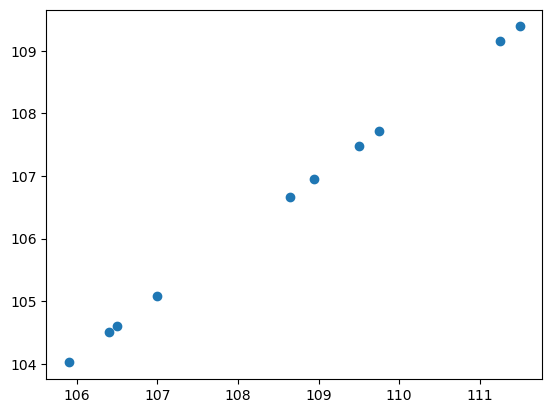

In [43]:
plt.scatter(test_X,pred_Y)

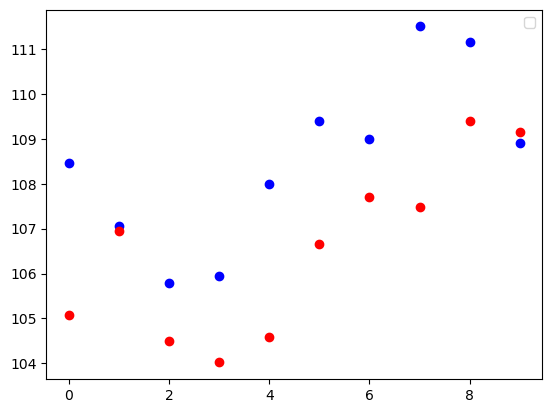

In [61]:
plt.scatter(range(len(test_Y)), test_Y, color='blue')
plt.scatter(range(len(pred_Y)), pred_Y, color='red')

In [45]:
from sklearn.metrics import mean_squared_error
print("Mean squared error : ", mean_squared_error(pred_Y,test_Y))


Mean squared error :  5.698103485964501
